In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# The fashion MNIST dataset: Clothing Classification

In [2]:
# load the fashion-MNIST data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/fashion-mnist_train.csv'
data = pd.read_csv(url)
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,8,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,0,0.0,0.0,0.003922,0.0,0.0,0.0,0.0,0.0,0.0,...,0.462745,0.400000,0.40000,0.188235,0.0,0.0,0.003922,0.0,0.0,0.0
3,8,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003045,0.002876,0.00303,0.002968,0.0,0.0,0.000000,0.0,0.0,0.0
4,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0


In [3]:
# feature matrix/target vector
y = data.label # labels 
X = data.iloc[:,1:785] # pixels

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. The following figure shows a few images from the fashion-MNIST dataset

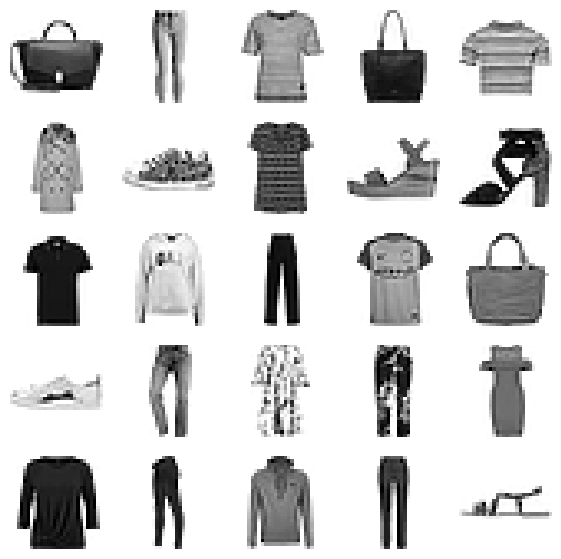

In [4]:
plt.figure(figsize=(7,7))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X.loc[i].values.reshape(28,28),cmap='binary')
    plt.axis('off')  

**Labels:**

| Label | Description |
| :- | -: |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

**Part 1:** We are going to train a k-nearest neighbor model that predicts the labels of clothing images.

Import and instantiate a k-nearest neighbors model

In [17]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import GridSearchCV

knn = KNN()

Use a grid search to tune in the classifier hyperparameters `n_neighbors` and `weights`

In [12]:
param_grid = {'n_neighbors':list(range(1,15)),
              'weights':['uniform','distance']}

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [13]:
# examine the best model hyperparameters
print(grid.best_params_)

{'n_neighbors': 10, 'weights': 'distance'}


In [14]:
# best classifier
best_knn = grid.best_estimator_

**Part 2:** We'll use accuracy and a confusion matrix to evaluate the performance of our model on the test set.

In [15]:
# load the training data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/fashion-mnist_test.csv'
data_test = pd.read_csv(url)

# feature matrix/target vector 
y_test = data_test.label # labels 
X_test = data_test.iloc[:,1:785] # pixels

In [18]:
# import accuracy_score and confusion_matrix from sklearn.metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [20]:
# accuracy
y_pred = best_knn.predict(X_test)
print('accuracy =',accuracy_score(y_test,y_pred))

accuracy = 0.7805


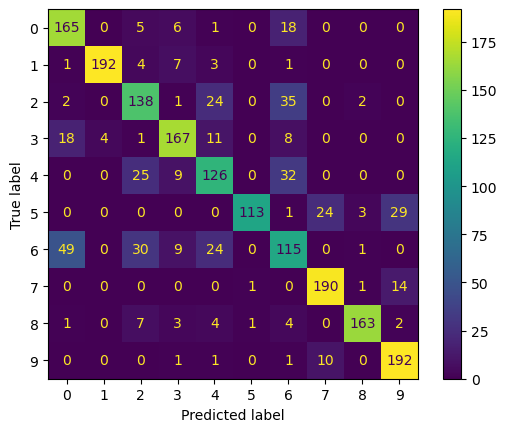

In [21]:
# confusion matrix
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()